## Unsupervised Learning
- Unsupervised learning finds patterns in data
    - E.g. clustering customers by their purchases
    - Compressing the data using purchase patterns (dimension reduction)
### Supervised vs unsupervised
- Supervised learning find patterns for a prediction task
- Unsupervised learning is pure pattern discovery without any lables


### CLusting on Iris dataset

In [7]:
# Do clustersing on iris dataset

from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

iris = load_iris()
kmeans = KMeans(n_clusters=3)
kmeans.fit(iris.data)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

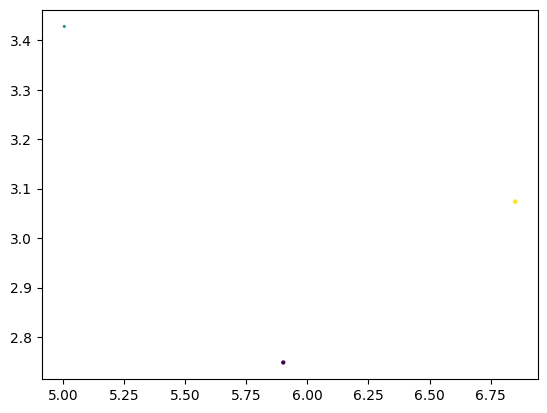

In [8]:
import matplotlib.pyplot as plt
centroids = kmeans.cluster_centers_

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids[:,0],centroids[:,1],centroids[:,2],c=[0,1,2])
plt.show()

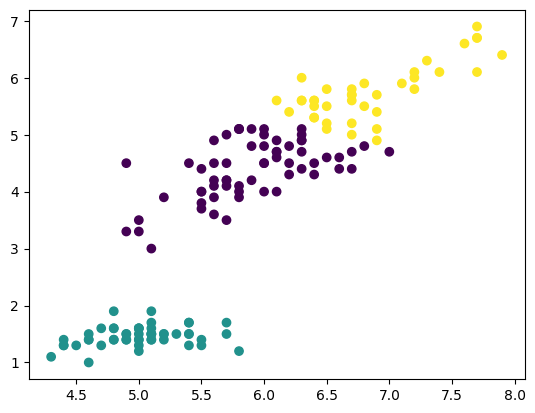

In [9]:
import matplotlib.pyplot as plt

xs = iris.data[:,0]
ys = iris.data[:,2]

plt.scatter(xs, ys, c=kmeans.labels_)
plt.show()

## Cluster labels for new Samples
- New samples can be assigned to existing clusters
- k-means remembers the mean of each cluster (the "centroids")
- Find the nearest centroid to each new sample

In [10]:
import numpy as np
new_sample= np.array([[5.7, 4.4, 1.5, 0.4],
                        [6.5, 3., 5.5, 1.8],
                        [5.8, 2.7, 5.1, 1.9]])

new_labels=kmeans.predict(new_sample)
print(new_labels)

[1 2 0]


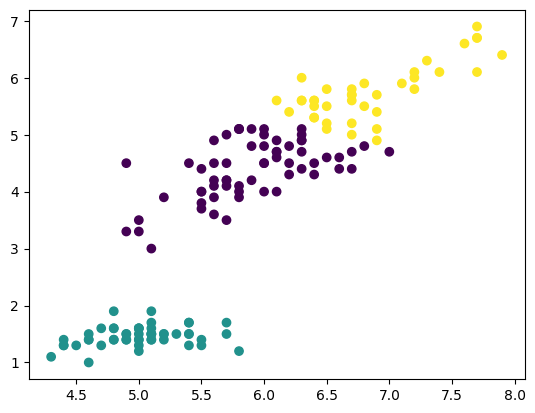

In [11]:
import matplotlib.pyplot as plt

xs = iris.data[:,0]
ys = iris.data[:,2]

plt.scatter(xs, ys, c=kmeans.labels_)
plt.show()

### Datacamp

In [12]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)


NameError: name 'points' is not defined

In [13]:
# Import pyplot
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys,c=labels,alpha=0.5)
# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D',s=100)
plt.show()


NameError: name 'new_points' is not defined

## Evaluating a clustering
- Can check the correspindence with e.g. iris species
- But what i there are no species to check against?
- Measure quality of clustering
- Used to make informed choice on the number of clusters

## Iris: clusters vs species
- k-means found 3 clusters amonst the iris samples
- Do the clusters correspond to the species?

species  setosa versicolor virinica
labels
0          0       2       36
1          50      0       0
2          0      48      14

## Cross tabulation with pandas
- Clusters vsspecies is a "cross-tabulation"
- use the pandas library
- Given the species of each sample as a list species


In [16]:
import pandas as pd
kmean=KMeans(n_clusters=3)
kmean.fit(iris.data)
labels=kmean.labels_
df=pd.DataFrame({'labels':labels,'species':iris.target})
ct=pd.crosstab(df['labels'],df['species'],margins=True)
print(ct)

species   0   1   2  All
labels                  
0         0  47  14   61
1        50   0   0   50
2         0   3  36   39
All      50  50  50  150


## Measuring clustering quality
- Using only samples and their cluster labels
- A good cluster has tight clusters
- Samples in each cluster are bunched togther

## Inertia measures clustering quality
- Measures how spread out the clusters are (lower is better)
- Distance from each sample to centroid of its cluster
After fit(), available as attribute inertia_
- k-means attempts to minimize the inertia when choosing
clusters

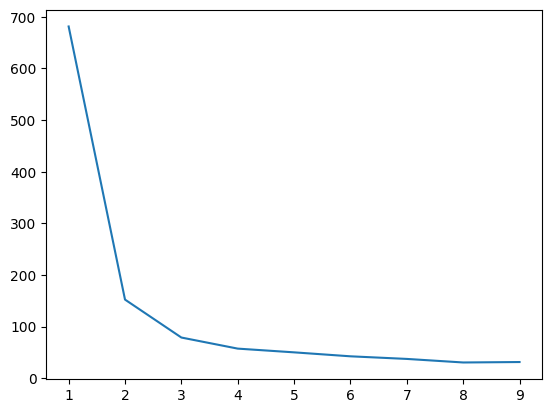

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Find the best number of culsters using the elbow method


res=[]

for n in range(1,10):
    model=KMeans(n_clusters=n)
    model.fit(iris.data)
    inertia=model.inertia_
    res.append(inertia)

plt.plot(range(1,10),res)
plt.show()
# From the graph we see that the best number of clusters is 3

### Seeds dataset

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\abhip\AppData\Local\Temp\ipykernel_30508\3275068127.py:1: SyntaxWarning: invalid escape sequence '\s'
  df=pd.read_csv('data\\seeds_dataset.txt',sep='\s+',header=None)


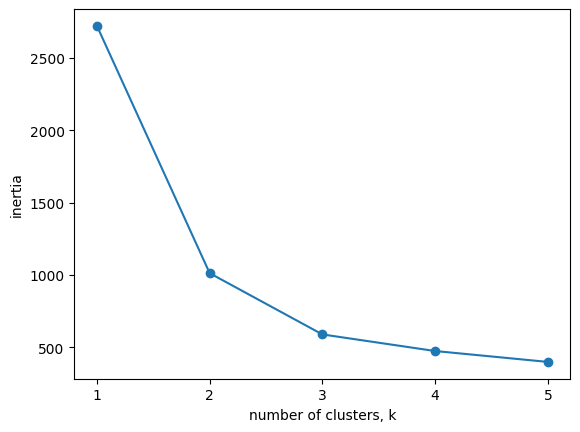

In [ ]:
df=pd.read_csv('data\\seeds_dataset.txt',sep='\s+',header=None)
df.columns = [
    "area", "perimeter", "compactness", "length",
    "width_kernel", "asymmetry_coeff", "groove", "class"
]
df['varieties'] = df['class'].map({1: 'Kama', 2: 'Rosa', 3: 'Canadian'})
samples=df.iloc[:,:7].values
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model=KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [37]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': df['varieties']})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)

varieties  Baralello  Bareba  Gringolo
labels                                
0                  0      30         0
1                 62       1        37
2                  9      28        11


## Transforming fratures for better Clustering 

### Pidemont Wine Dataset

In [38]:
wine = load_wine()
df=pd.DataFrame(wine.data,columns=wine.feature_names)
df['varieties']=wine.target
df['varieties'] = df['varieties'].map({0: 'Bareba', 1: 'Baralello', 2: 'Gringolo'})


In [39]:
#Clustering the wine data
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
wine = load_wine()
samples = wine.data


#scaler = StandardScaler()
kmeans=KMeans(n_clusters=3)
labels=kmeans.fit_predict(wine.data)

In [40]:
labels

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int32)

In [41]:
df_ct=pd.DataFrame({'labels': labels, 'varieties': df['varieties']})
ct=pd.crosstab(df_ct['labels'],df_ct['varieties'])
print(ct)


varieties  Baralello  Bareba  Gringolo
labels                                
0                 50       0        19
1                  1      46         0
2                 20      13        29


As we can see this time the k-means clusters do not align well with the wine varities. This is because therer is significant variance between the features. 

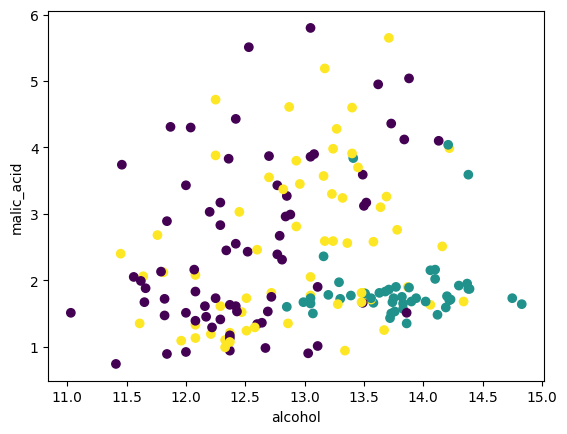

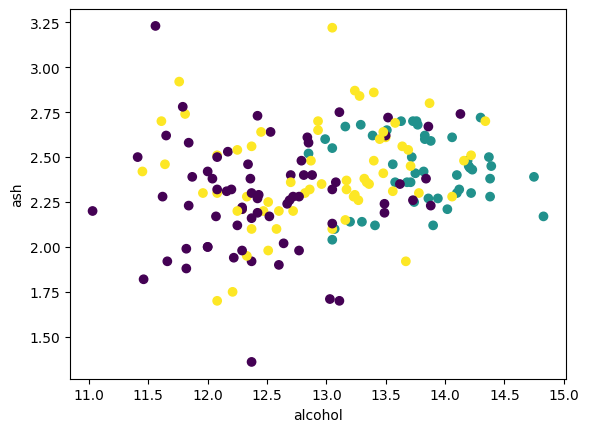

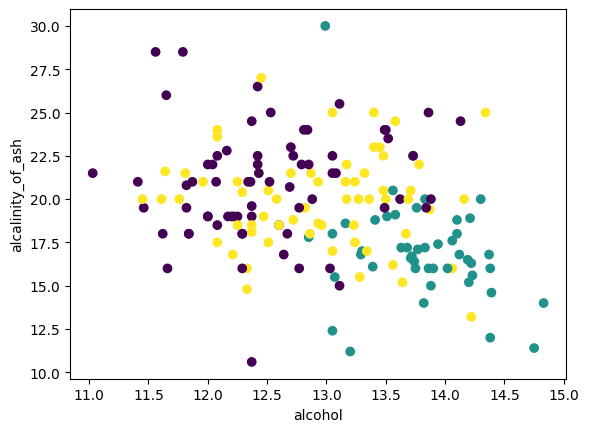

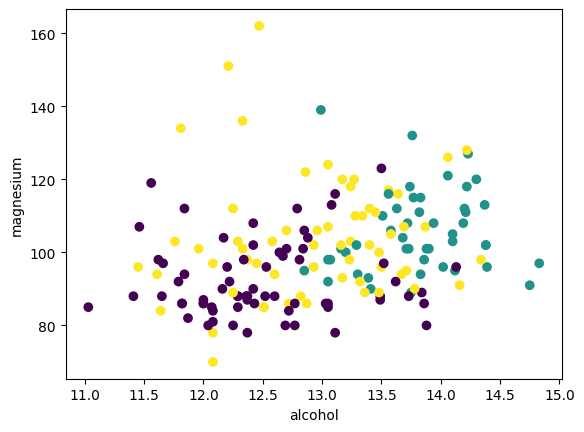

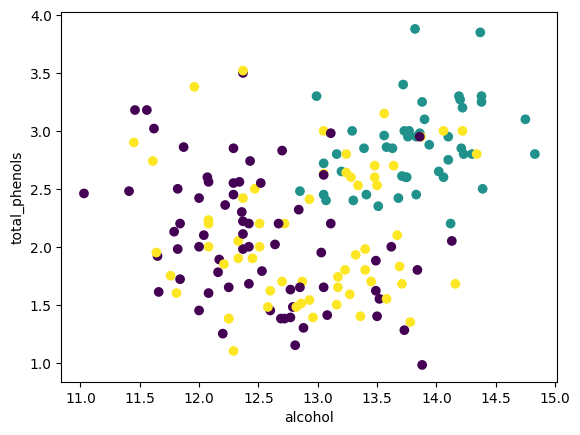

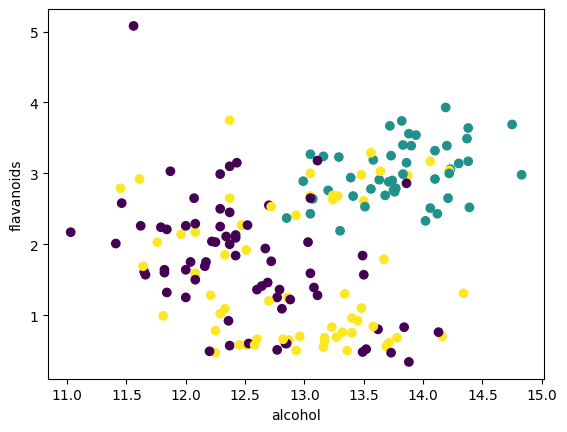

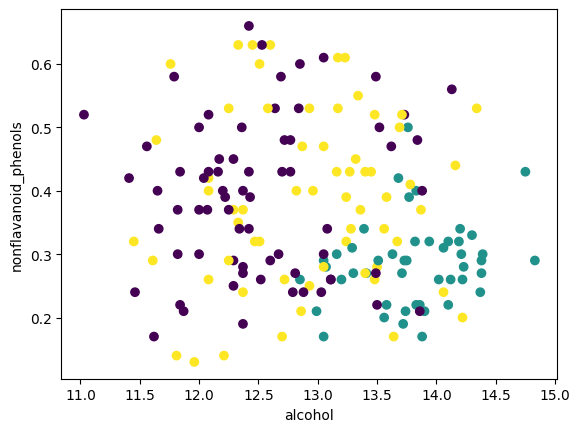

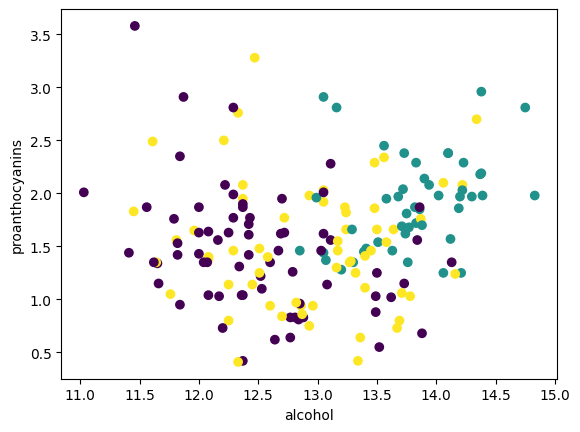

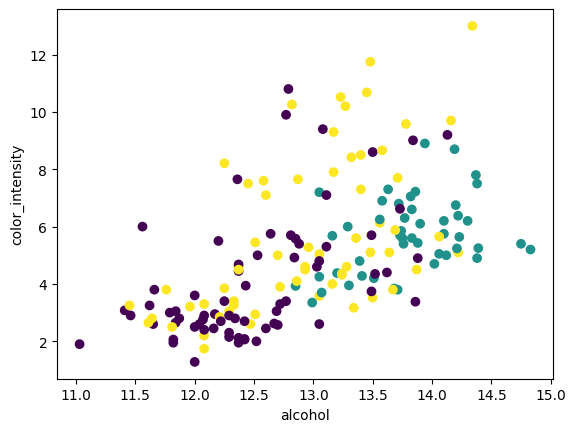

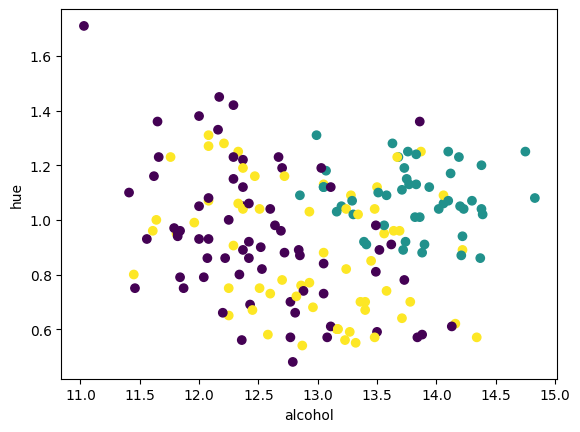

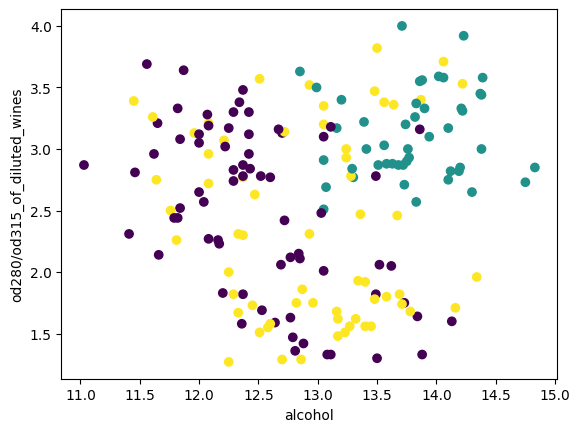

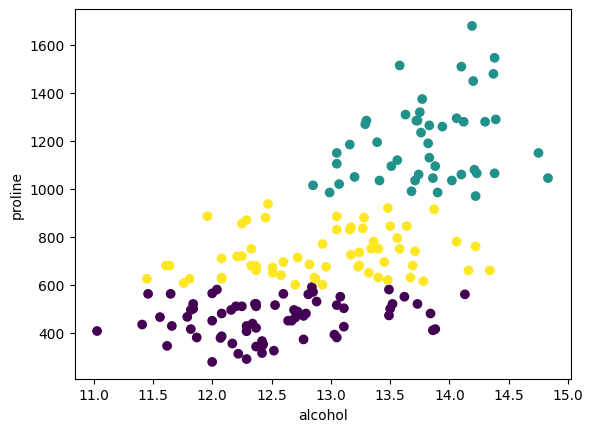

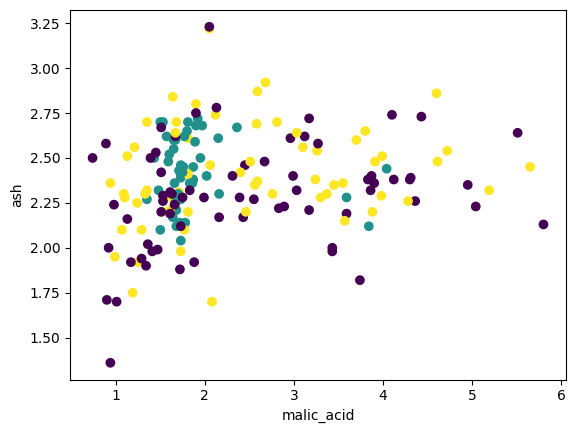

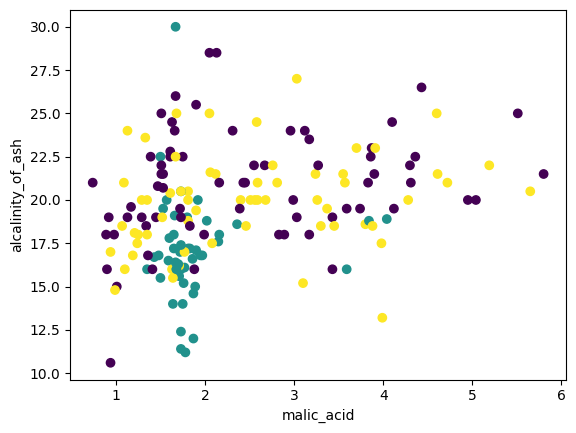

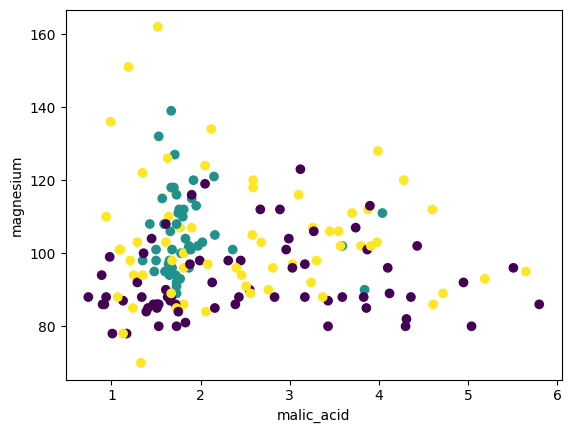

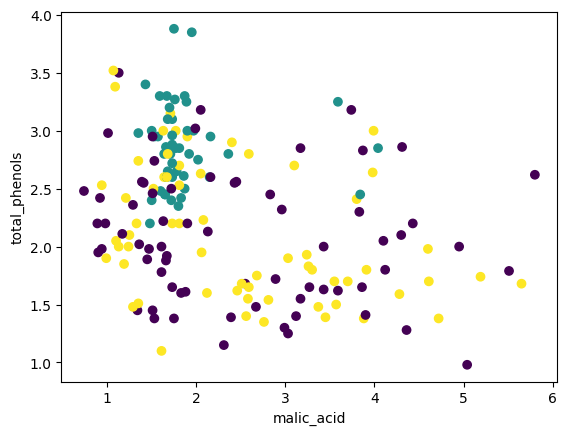

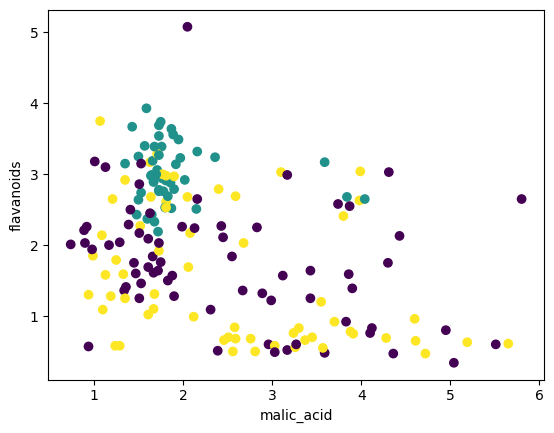

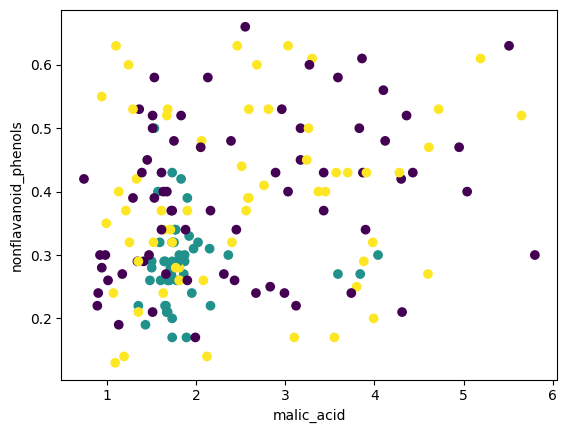

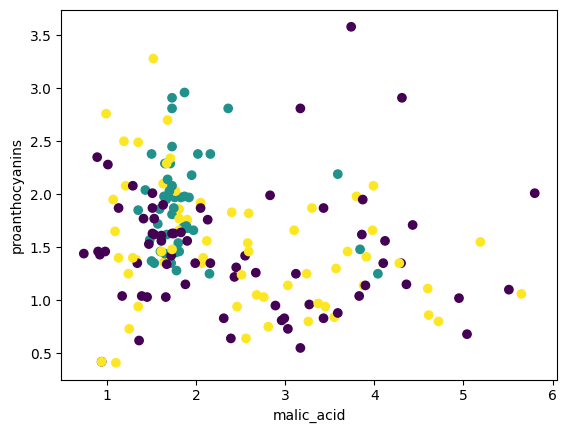

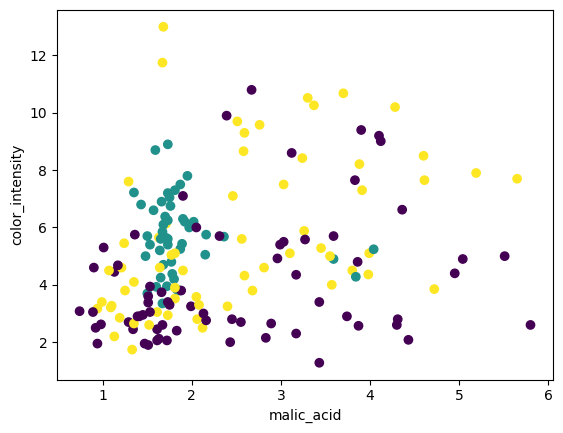

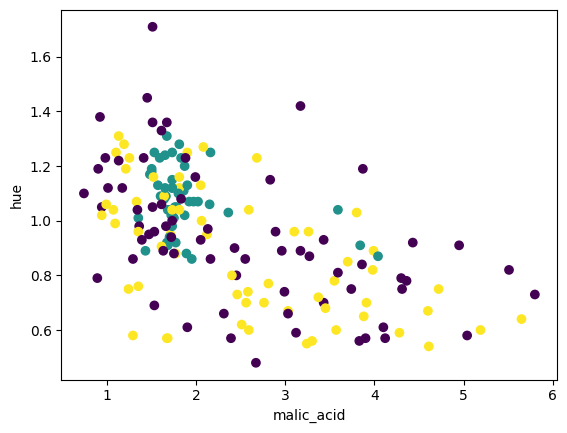

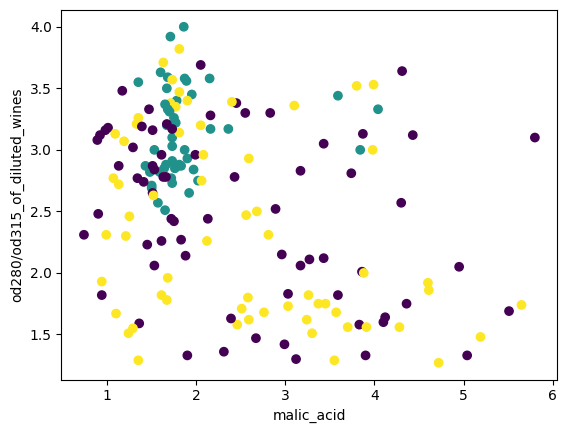

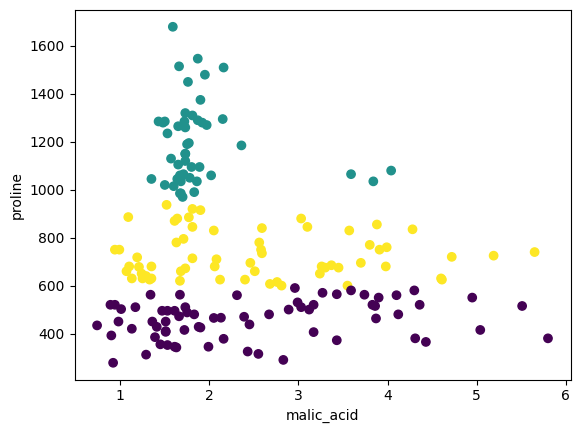

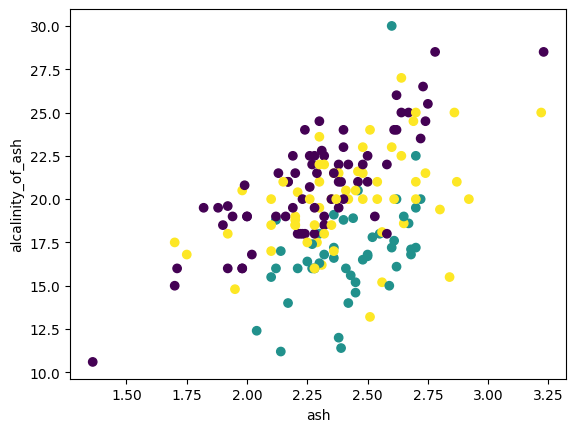

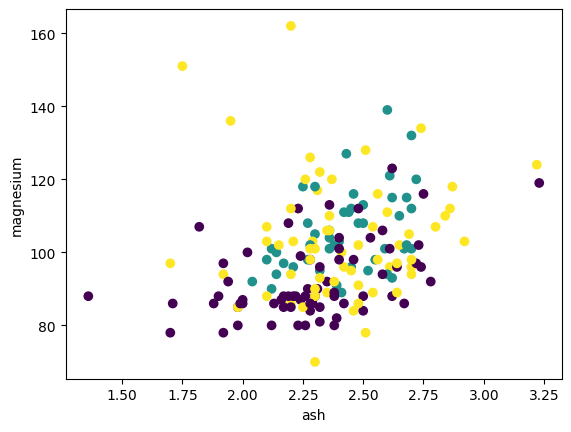

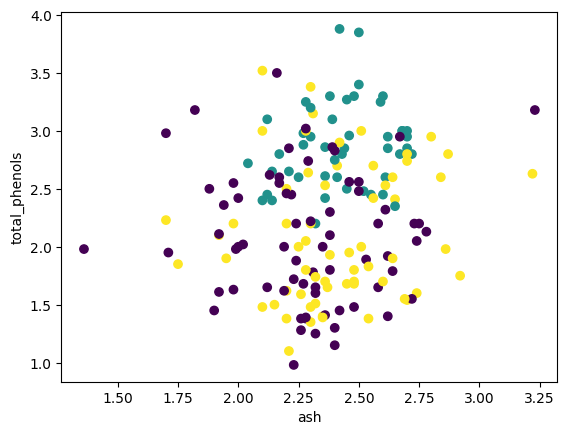

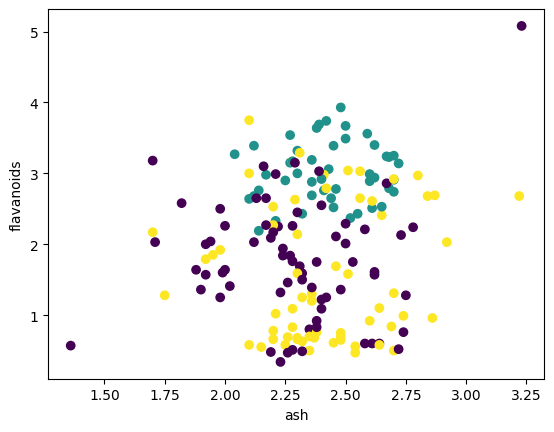

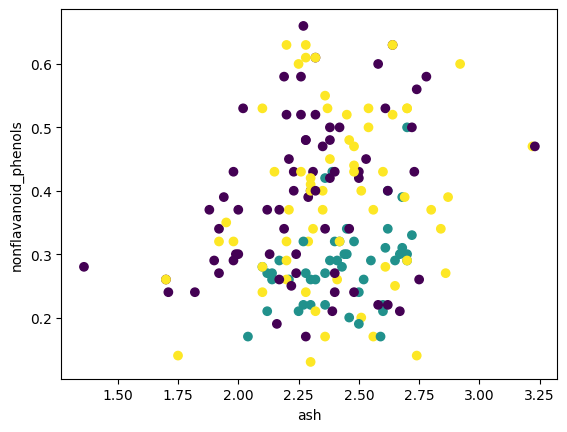

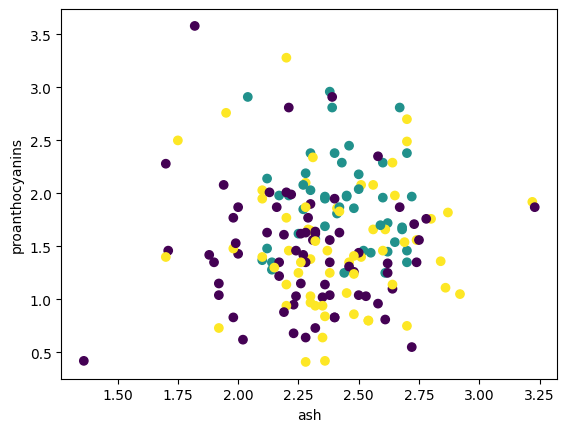

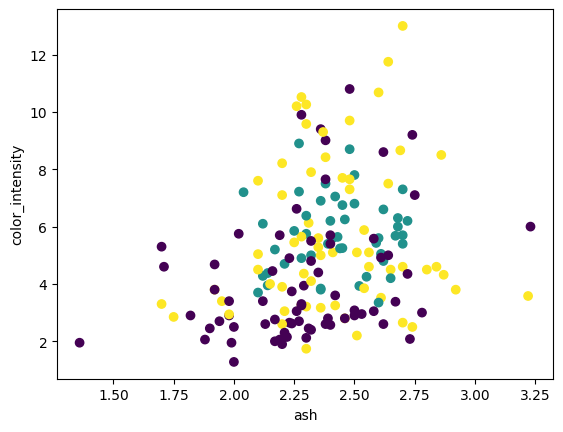

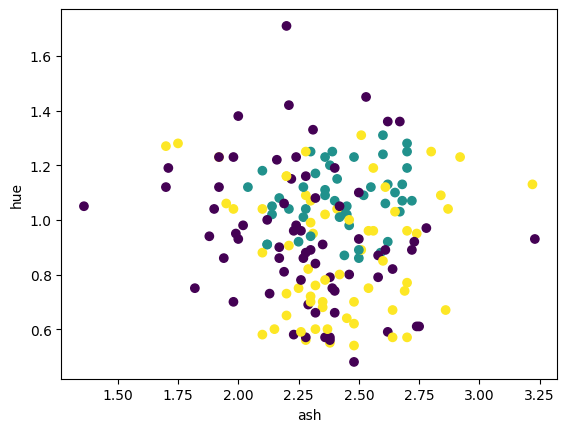

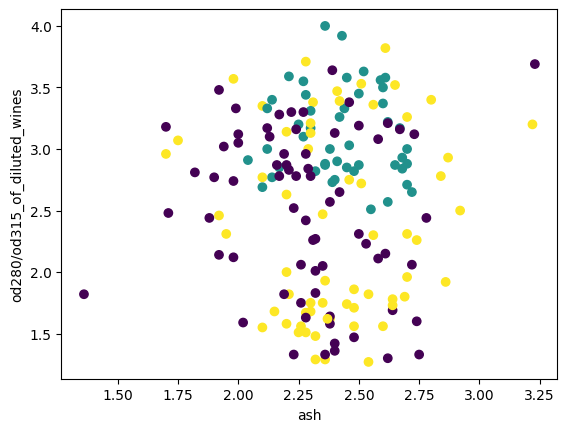

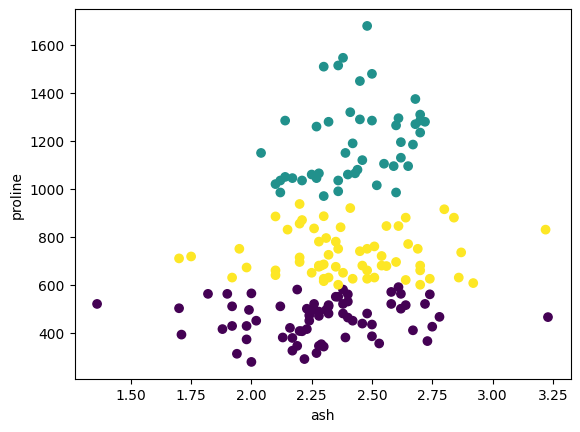

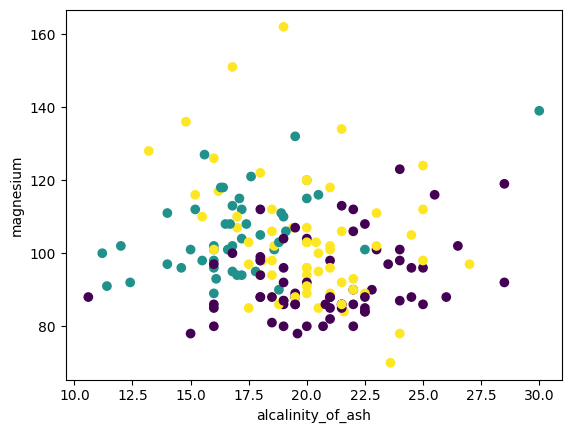

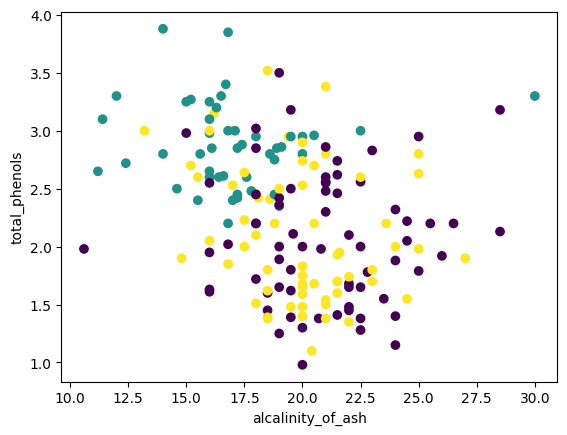

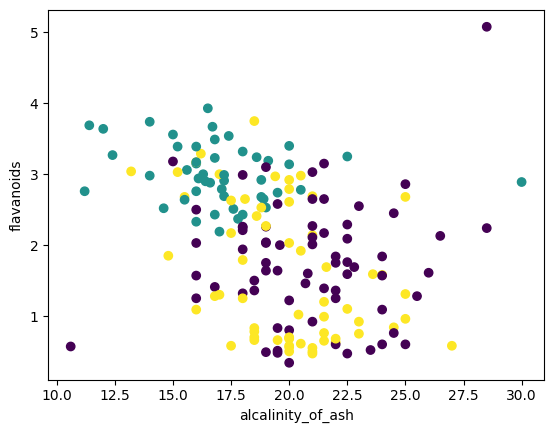

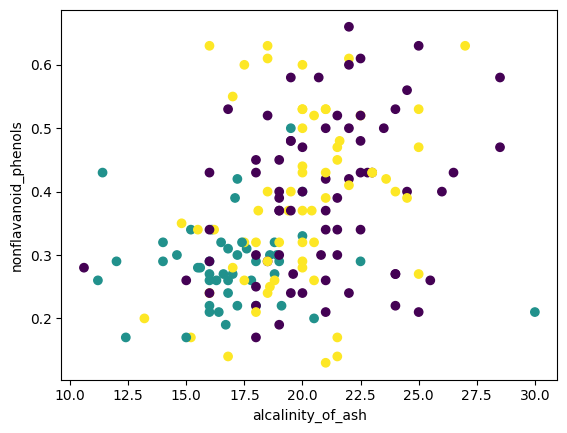

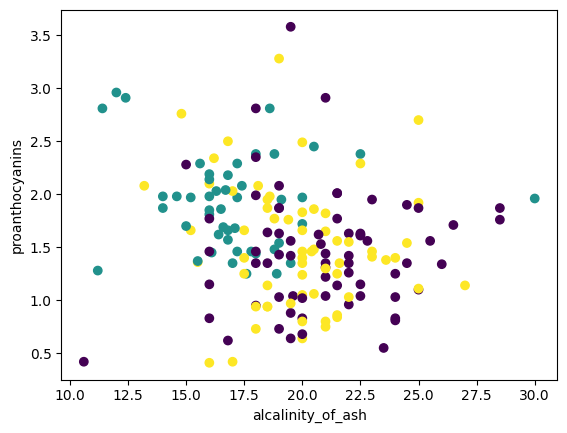

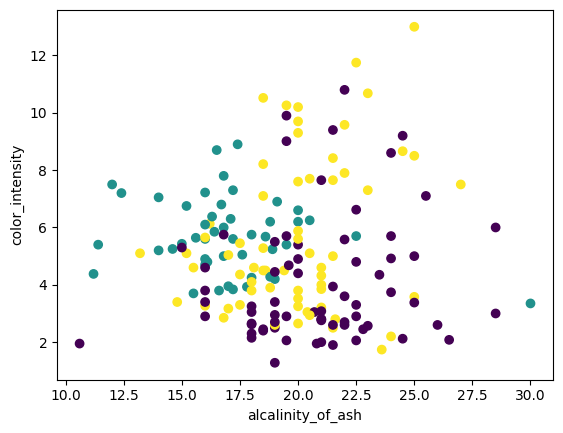

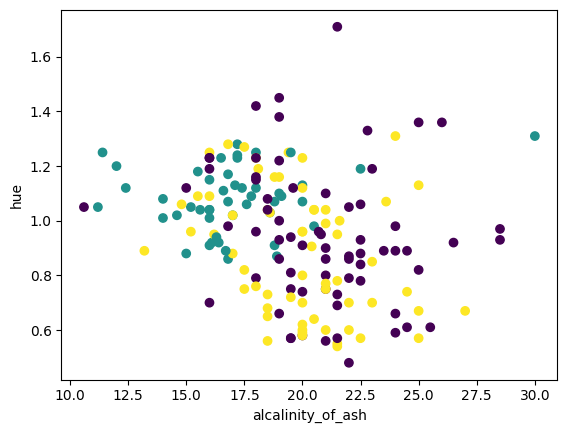

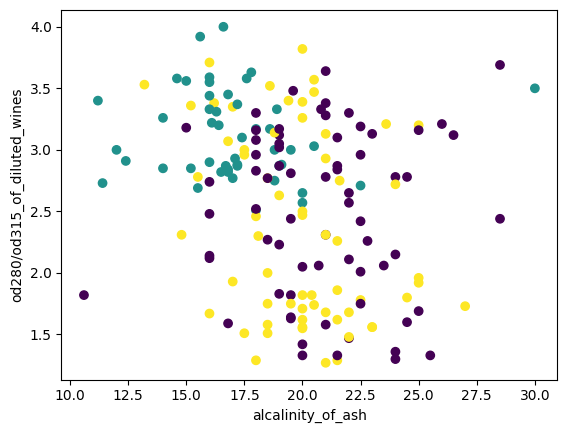

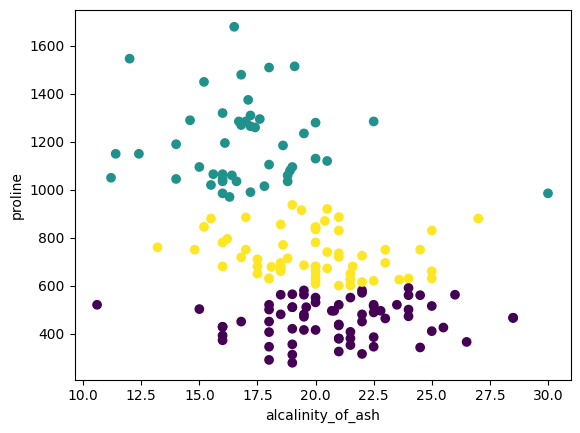

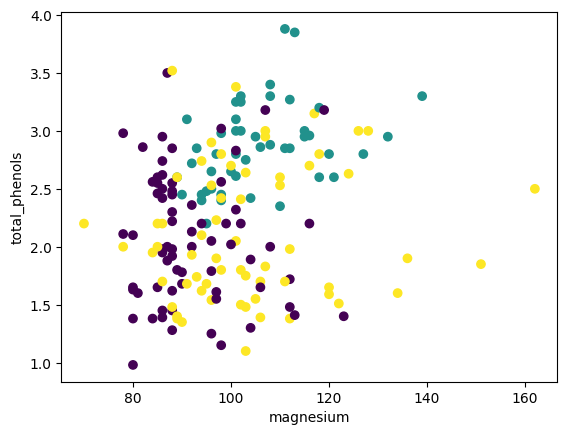

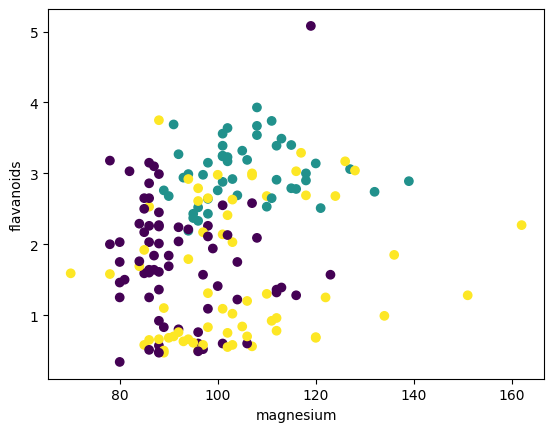

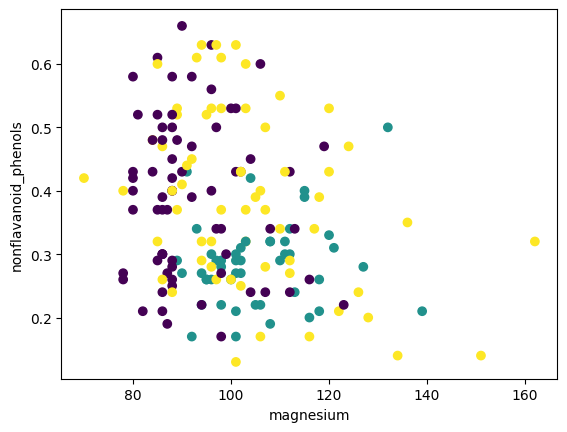

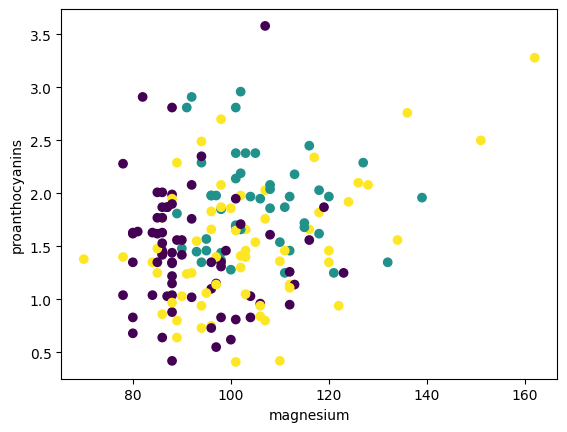

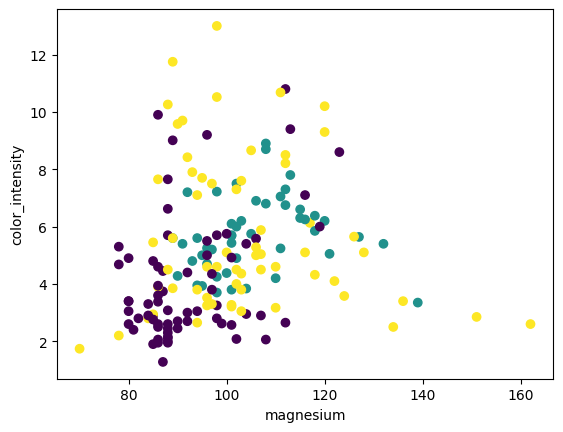

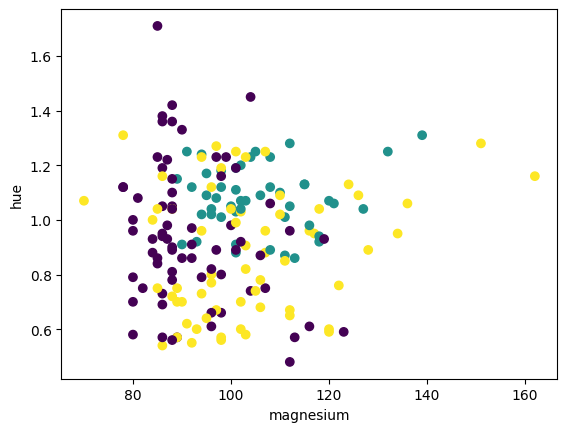

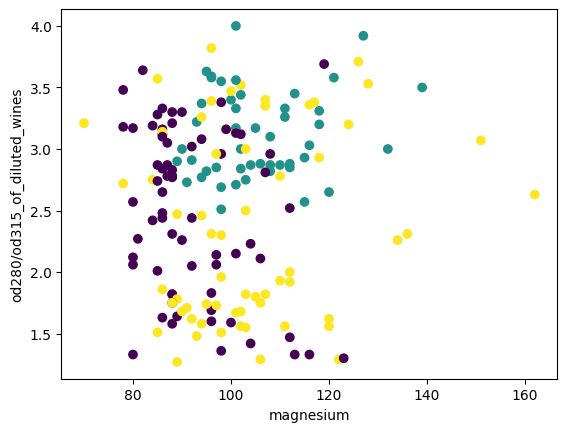

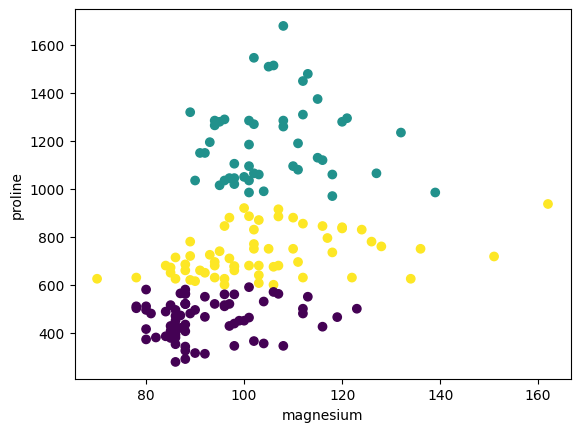

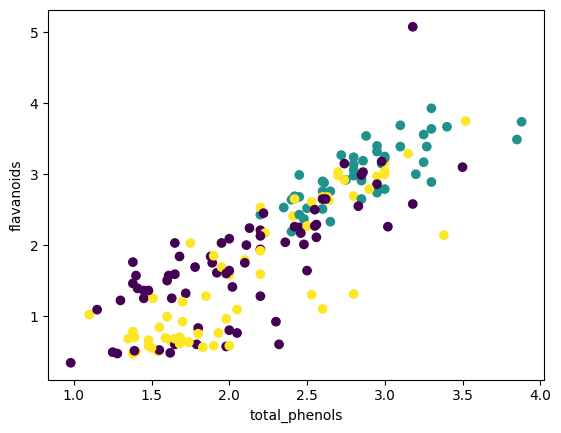

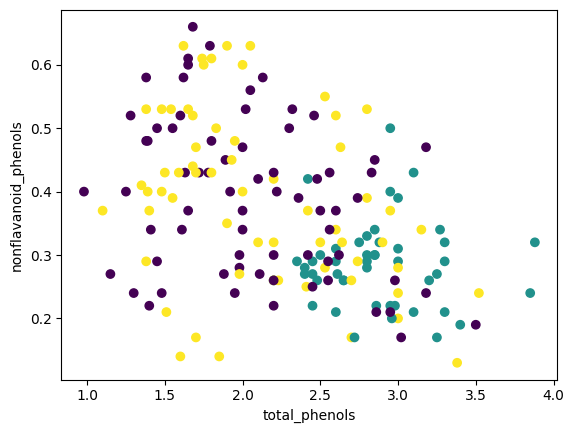

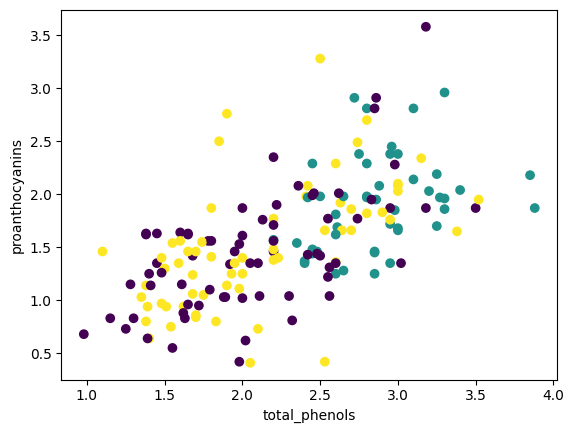

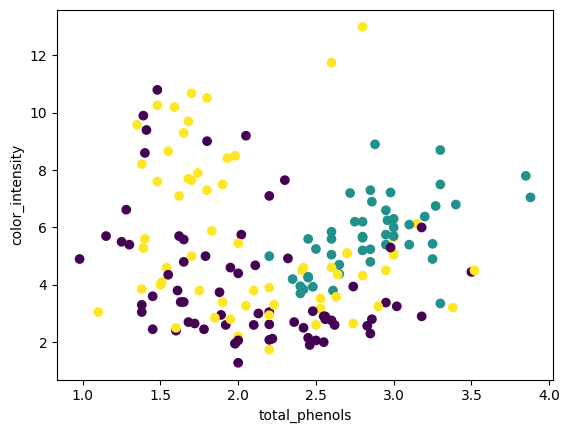

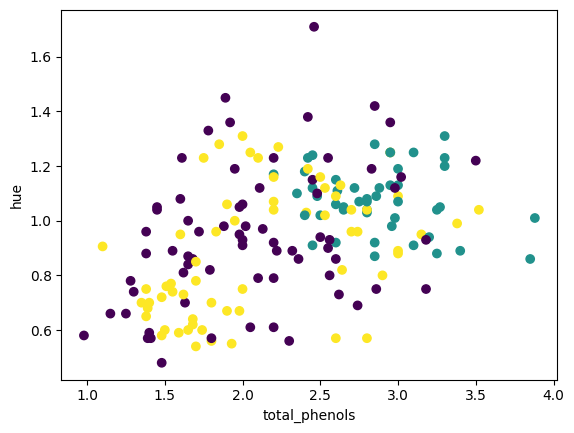

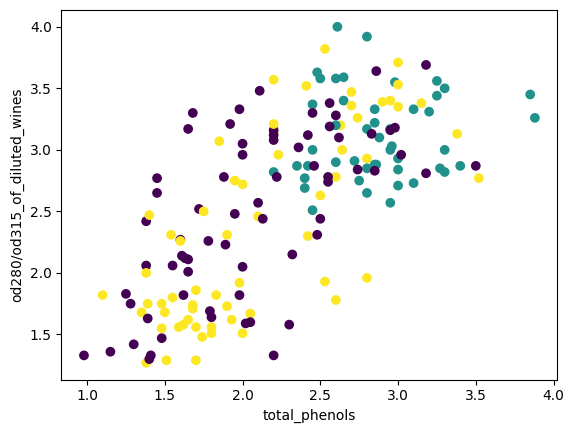

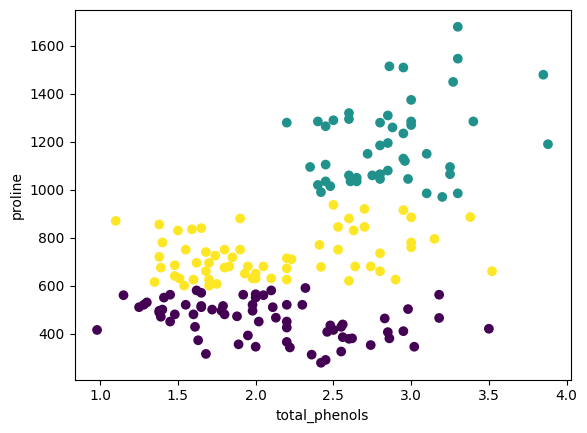

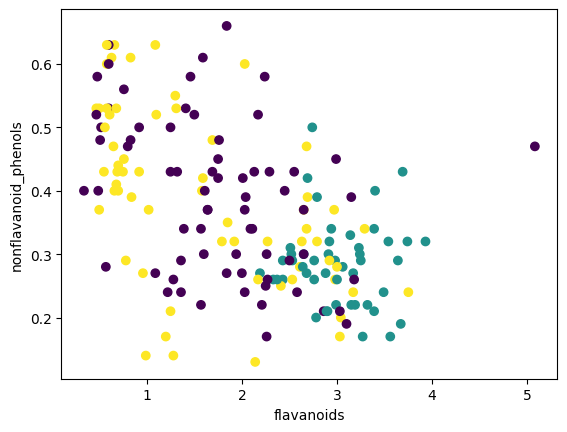

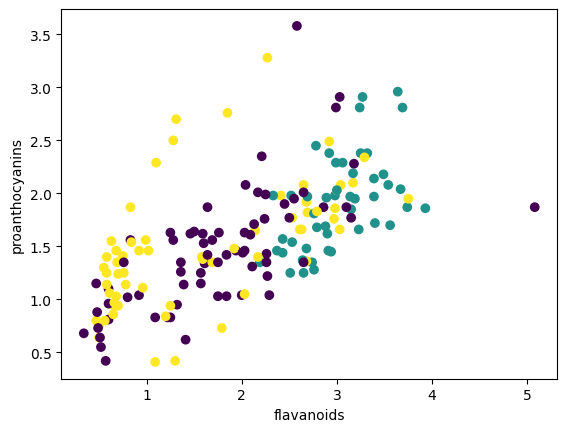

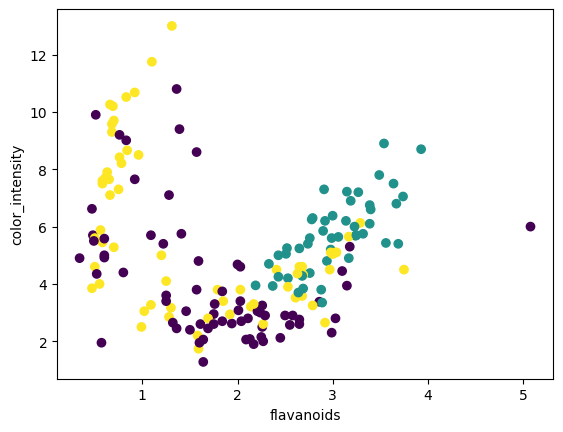

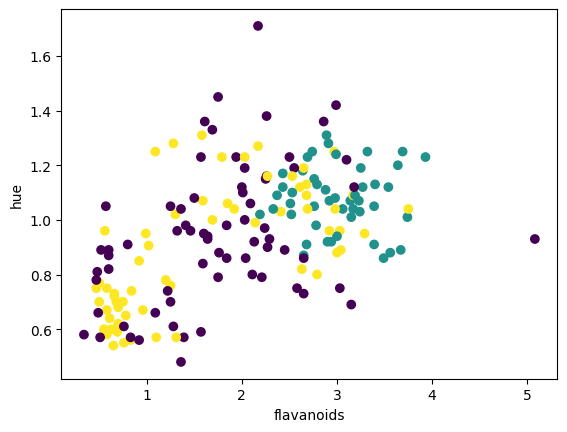

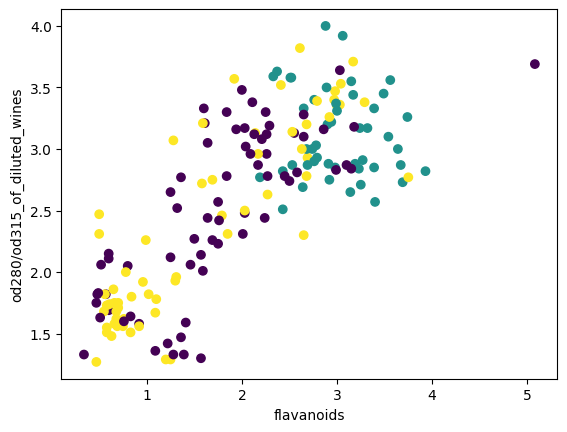

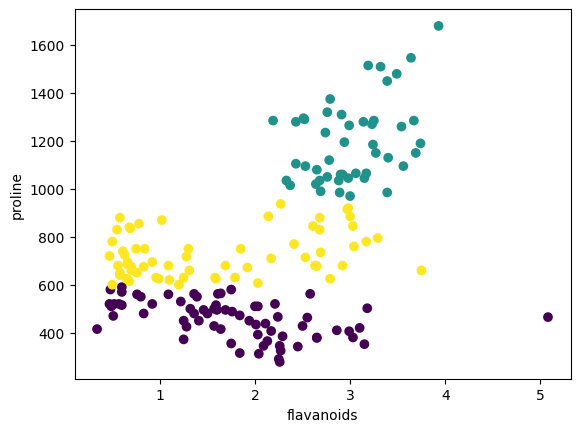

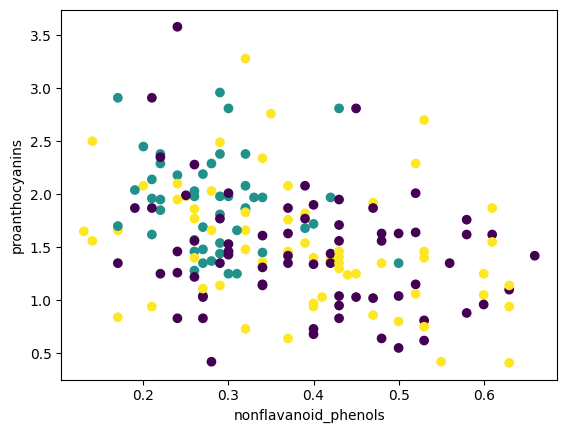

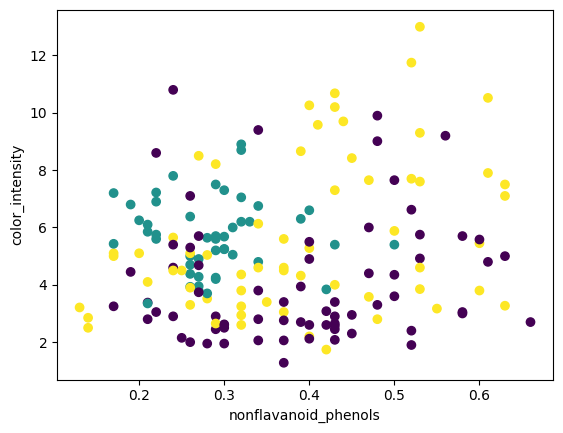

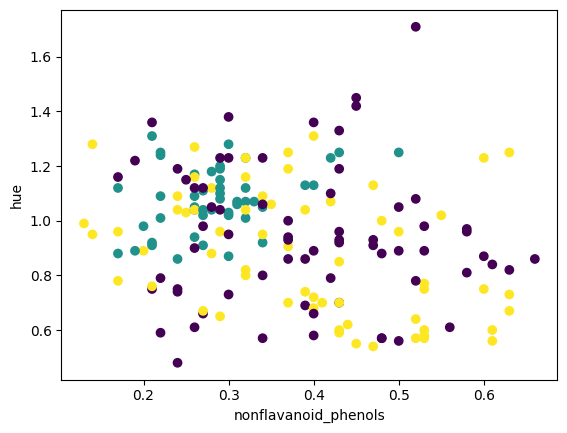

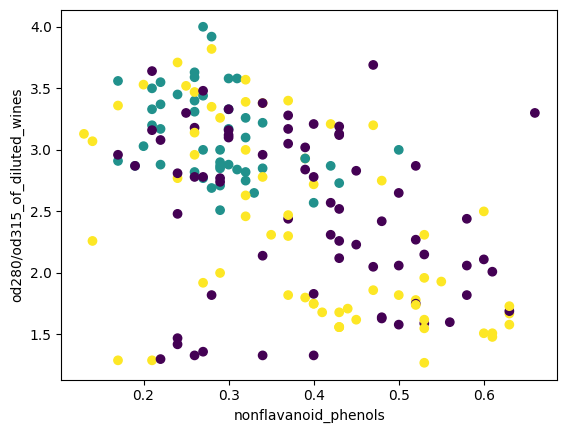

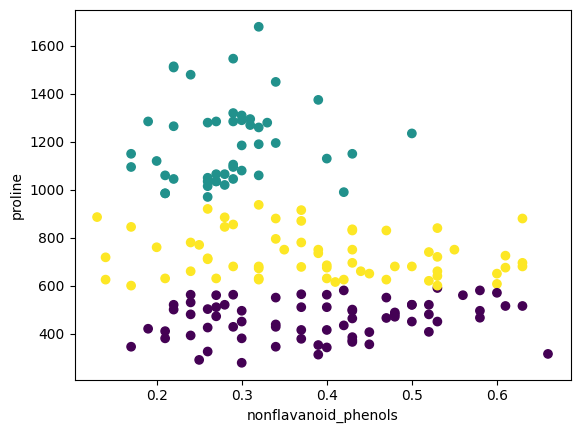

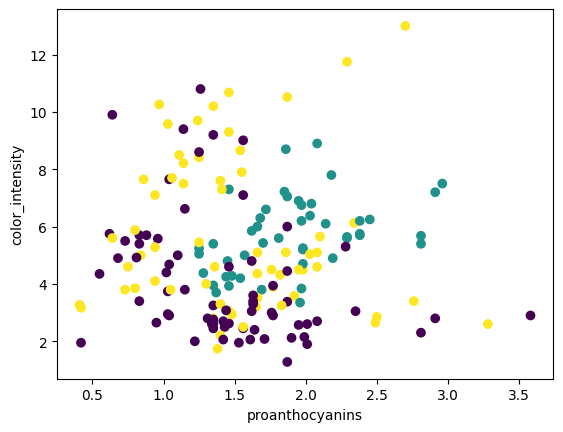

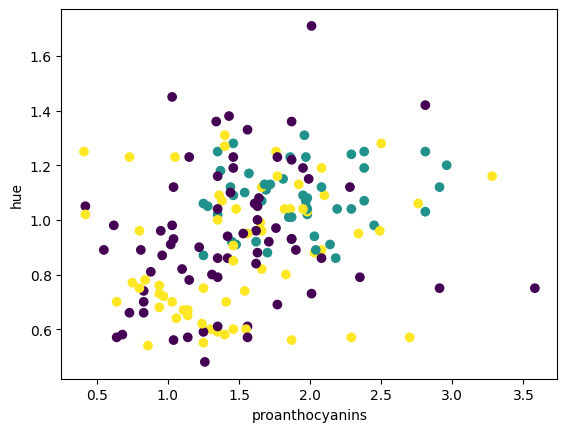

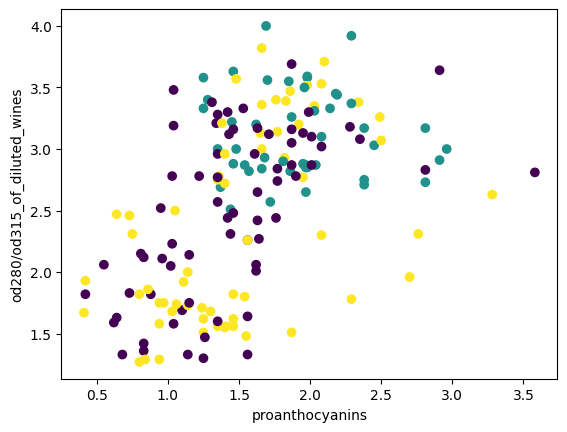

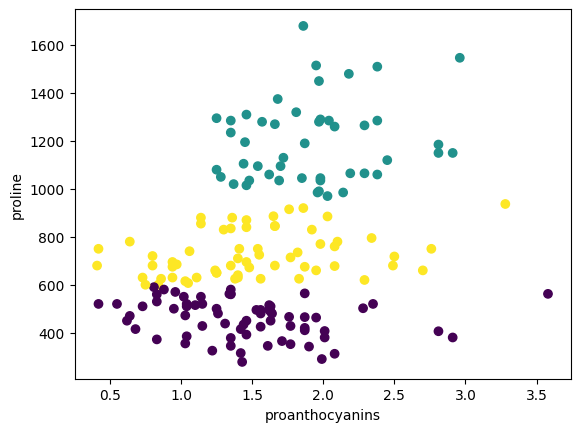

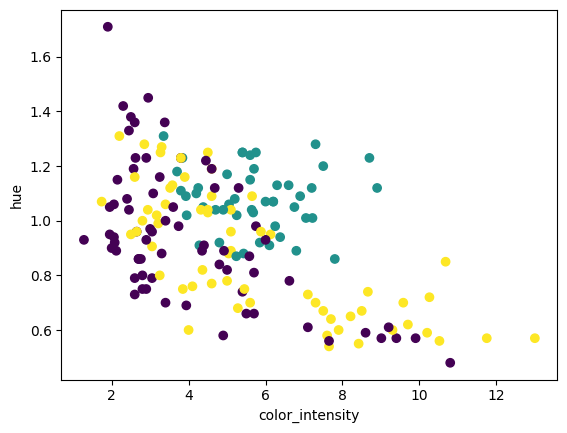

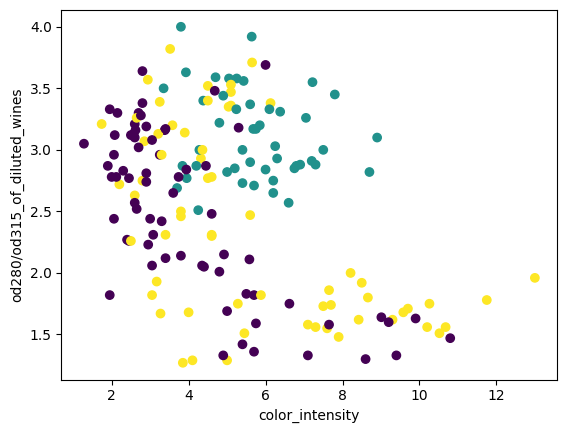

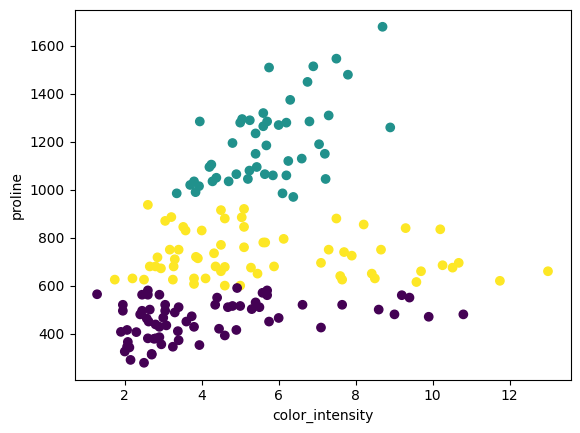

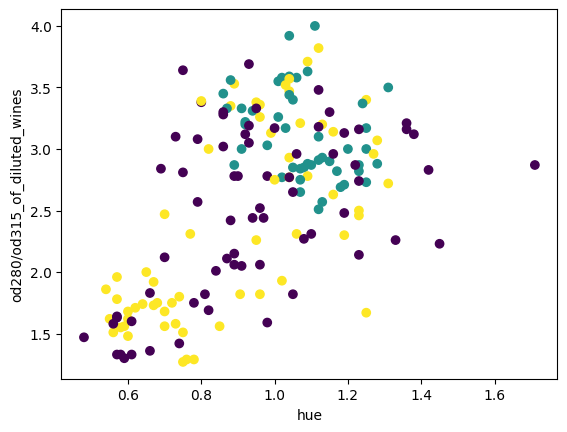

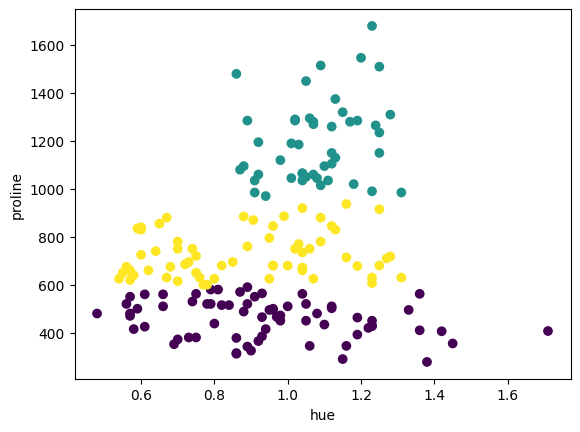

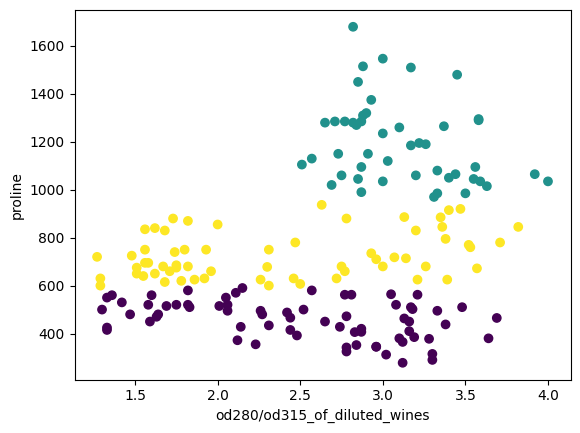

In [44]:
#Calculating the variance of each feature in the wine datase
variances = wine.data.var(axis=0)
variances
#Find that the variances are very high for some features
#So we need to standardize the data before clustering

#Create scatter plot comparing the each feature with each other
import matplotlib.pyplot as plt
import itertools   
for i, j in itertools.combinations(range(13), 2):
    plt.scatter(wine.data[:, i], wine.data[:, j], c=labels)
    plt.xlabel(wine.feature_names[i])
    plt.ylabel(wine.feature_names[j])
    plt.show()

### In K-means clustering the variance of a feature has a significant impact on clustering. Therfore it is important to use StandardScaler before clustering

In [47]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
wine = load_wine()
samples = wine.data


scaler = StandardScaler(copy=True,with_mean=True,with_std=True)
kmeans=KMeans(n_clusters=3)

pipeline=make_pipeline(scaler,kmeans)
labels=pipeline.fit_predict(samples)



new_df = pd.DataFrame({'labels': labels, 'varieties': df['varieties']})
ct = pd.crosstab(new_df['labels'],new_df['varieties'])
print(ct)


varieties  Baralello  Bareba  Gringolo
labels                                
0                 66       0         0
1                  2      59         0
2                  3       0        48
